<a href="https://colab.research.google.com/github/ErnestoAragon03/Seminario-Profesional-IA/blob/master/Breast_Cancer_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparations

## Workframe Setup

In [42]:
# ----- Libraries ----- #

# This is the main Library that allows us to work with Neural Networks
import tensorflow as tf

# For graph plotting
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

# For dataset manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# For visualizing more complex graphs
import seaborn as sns

# Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE

# Kaggle setup
import kagglehub

## Dataset Preparations

In [43]:
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


In [44]:
raw_data = pd.read_csv(path + '/data.csv')
raw_data


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [45]:
raw_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [46]:
# Drop the trash column
raw_data = raw_data.drop(columns=['Unnamed: 32'])
raw_data.shape

(569, 32)

In [47]:
# Drop Nulls
print(raw_data.isnull().sum())
raw_data = raw_data.dropna()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [48]:
raw_data.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


### Encoding

In [49]:
# prompt: Function to map values in the diagnosis column to an int (M = 0, B = 1)

def map_diagnosis(diagnosis):
    if diagnosis == 'M':
        return 0
    elif diagnosis == 'B':
        return 1
    else:
        return -1 # Handle cases where diagnosis is neither 'M' nor 'B'


raw_data['diagnosis'] = raw_data['diagnosis'].apply(map_diagnosis)


In [50]:
raw_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Oversampling

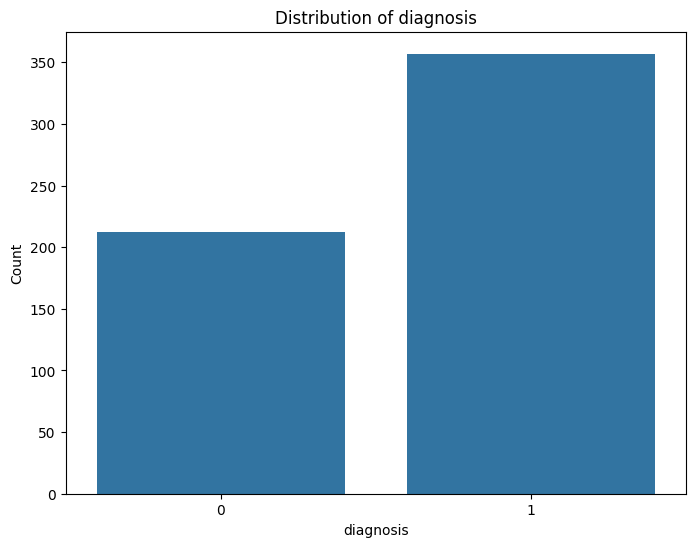

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=raw_data)
plt.title('Distribution of diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('Count')
plt.show()

In [52]:
# Lets extract how many classes there ar in class 0
class_one_count = raw_data['diagnosis'].value_counts()[1]
class_one_count

# Oversample the data that belongs to class '0' (M)
oversampled_class_zero = raw_data[raw_data['diagnosis'] == 0].sample(class_one_count, replace=True)

oversampled_class_zero

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
184,873885,0,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.8,973.1,0.1301,0.3299,0.3630,0.1226,0.3175,0.09772
202,878796,0,23.29,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.16200,...,25.12,32.68,177.0,1986.0,0.1536,0.4167,0.7892,0.2733,0.3198,0.08762
190,874858,0,14.22,23.12,94.37,609.9,0.10750,0.24130,0.19810,0.06618,...,15.74,37.18,106.4,762.4,0.1533,0.9327,0.8488,0.1772,0.5166,0.14460
87,86135502,0,19.02,24.59,122.00,1076.0,0.09029,0.12060,0.14680,0.08271,...,24.56,30.41,152.9,1623.0,0.1249,0.3206,0.5755,0.1956,0.3956,0.09288
280,8912049,0,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,...,23.72,35.90,159.8,1724.0,0.1782,0.3841,0.5754,0.1872,0.3258,0.09720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,896839,0,16.03,15.51,105.80,793.2,0.09491,0.13710,0.12040,0.07041,...,18.76,21.98,124.3,1070.0,0.1435,0.4478,0.4956,0.1981,0.3019,0.09124
99,862548,0,14.42,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.05839,...,16.33,30.86,109.5,826.4,0.1431,0.3026,0.3194,0.1565,0.2718,0.09353
100,862717,0,13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,...,16.99,35.27,108.6,906.5,0.1265,0.1943,0.3169,0.1184,0.2651,0.07397
31,853612,0,11.84,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,...,16.82,28.12,119.4,888.7,0.1637,0.5775,0.6956,0.1546,0.4761,0.14020


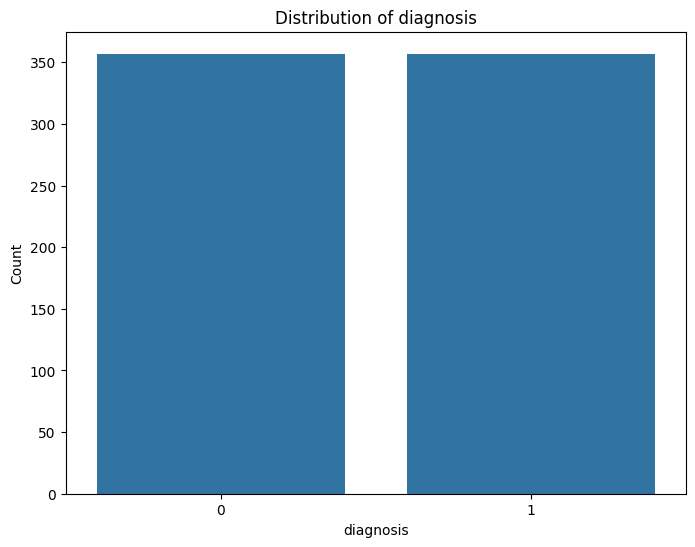

In [53]:
# Extract all the data with class 1
class_one_data = raw_data[raw_data['diagnosis'] == 1]

# Merge datasets
oversampled_dataset = pd.concat([oversampled_class_zero, class_one_data])

# Suffle the dataset
oversampled_dataset = oversampled_dataset.sample(frac=1).reset_index(drop=True)

plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=oversampled_dataset)
plt.title('Distribution of diagnosis')
plt.xlabel('diagnosis')
plt.ylabel('Count')
plt.show()

## Normalization

In [58]:
def normalize_columns(df, columns_to_normalize):
    """Normalizes specified columns in a Pandas DataFrame.

    Args:
      df: The input DataFrame.
      columns_to_normalize: A list of column names to normalize.

    Returns:
      A new DataFrame with the specified columns normalized.
    """

    # Create a copy to avoid modifying the original DataFrame
    normalized_df = df.copy()

    for column in columns_to_normalize:
        if column in normalized_df.columns:
            min_val = normalized_df[column].min()
            max_val = normalized_df[column].max()
            normalized_df[column] = (normalized_df[column] - min_val) / (max_val - min_val)
        else:
            print(f"Warning: Column '{column}' not found in DataFrame.")

    return normalized_df
dataset_normalized = normalize_columns(oversampled_dataset, ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'])
dataset_normalized

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,8911670,0,0.559847,0.347311,0.532859,0.406575,0.330414,0.121036,0.188086,0.305436,...,0.427962,0.327292,0.391404,0.258258,0.360864,0.086067,0.176518,0.444674,0.197516,0.015283
1,863270,1,0.254579,0.298613,0.243383,0.137094,0.290151,0.149592,0.061984,0.100418,...,0.190679,0.412313,0.175059,0.088208,0.320791,0.163974,0.154712,0.290103,0.279519,0.110258
2,91858,1,0.225709,0.265472,0.221823,0.118515,0.493545,0.238482,0.123874,0.232096,...,0.198150,0.425373,0.189800,0.090223,0.432860,0.153399,0.109105,0.347079,0.179972,0.147776
3,869476,1,0.232808,0.167061,0.237164,0.122715,0.564864,0.338077,0.087008,0.156979,...,0.185699,0.119670,0.178545,0.079729,0.483801,0.217724,0.075240,0.207629,0.229056,0.318510
4,915691,0,0.303800,0.365573,0.309930,0.175270,0.523337,0.391142,0.338884,0.427182,...,0.301672,0.470149,0.313213,0.162013,0.585682,0.347634,0.407827,0.704811,0.398186,0.366391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,852631,0,0.480808,0.226243,0.498998,0.326278,0.595558,0.638672,0.522749,0.732358,...,0.509427,0.250000,0.507944,0.313557,0.565985,0.356657,0.307748,0.876289,0.493002,0.333596
710,925622,0,0.389938,0.707136,0.411927,0.243224,0.470976,0.580701,0.598030,0.492891,...,0.341160,0.820096,0.389910,0.179365,0.479046,0.741634,0.934505,0.809622,0.497536,0.563164
711,8611161,1,0.300961,0.207981,0.295073,0.159703,0.498059,0.411386,0.274156,0.365238,...,0.270366,0.297708,0.230340,0.105609,0.559872,0.438348,0.388019,0.586942,0.386753,0.305392
712,924632,1,0.279190,0.649645,0.267501,0.157285,0.258193,0.119195,0.145286,0.122478,...,0.212024,0.632196,0.191394,0.100890,0.349997,0.130696,0.194808,0.223127,0.159077,0.113997


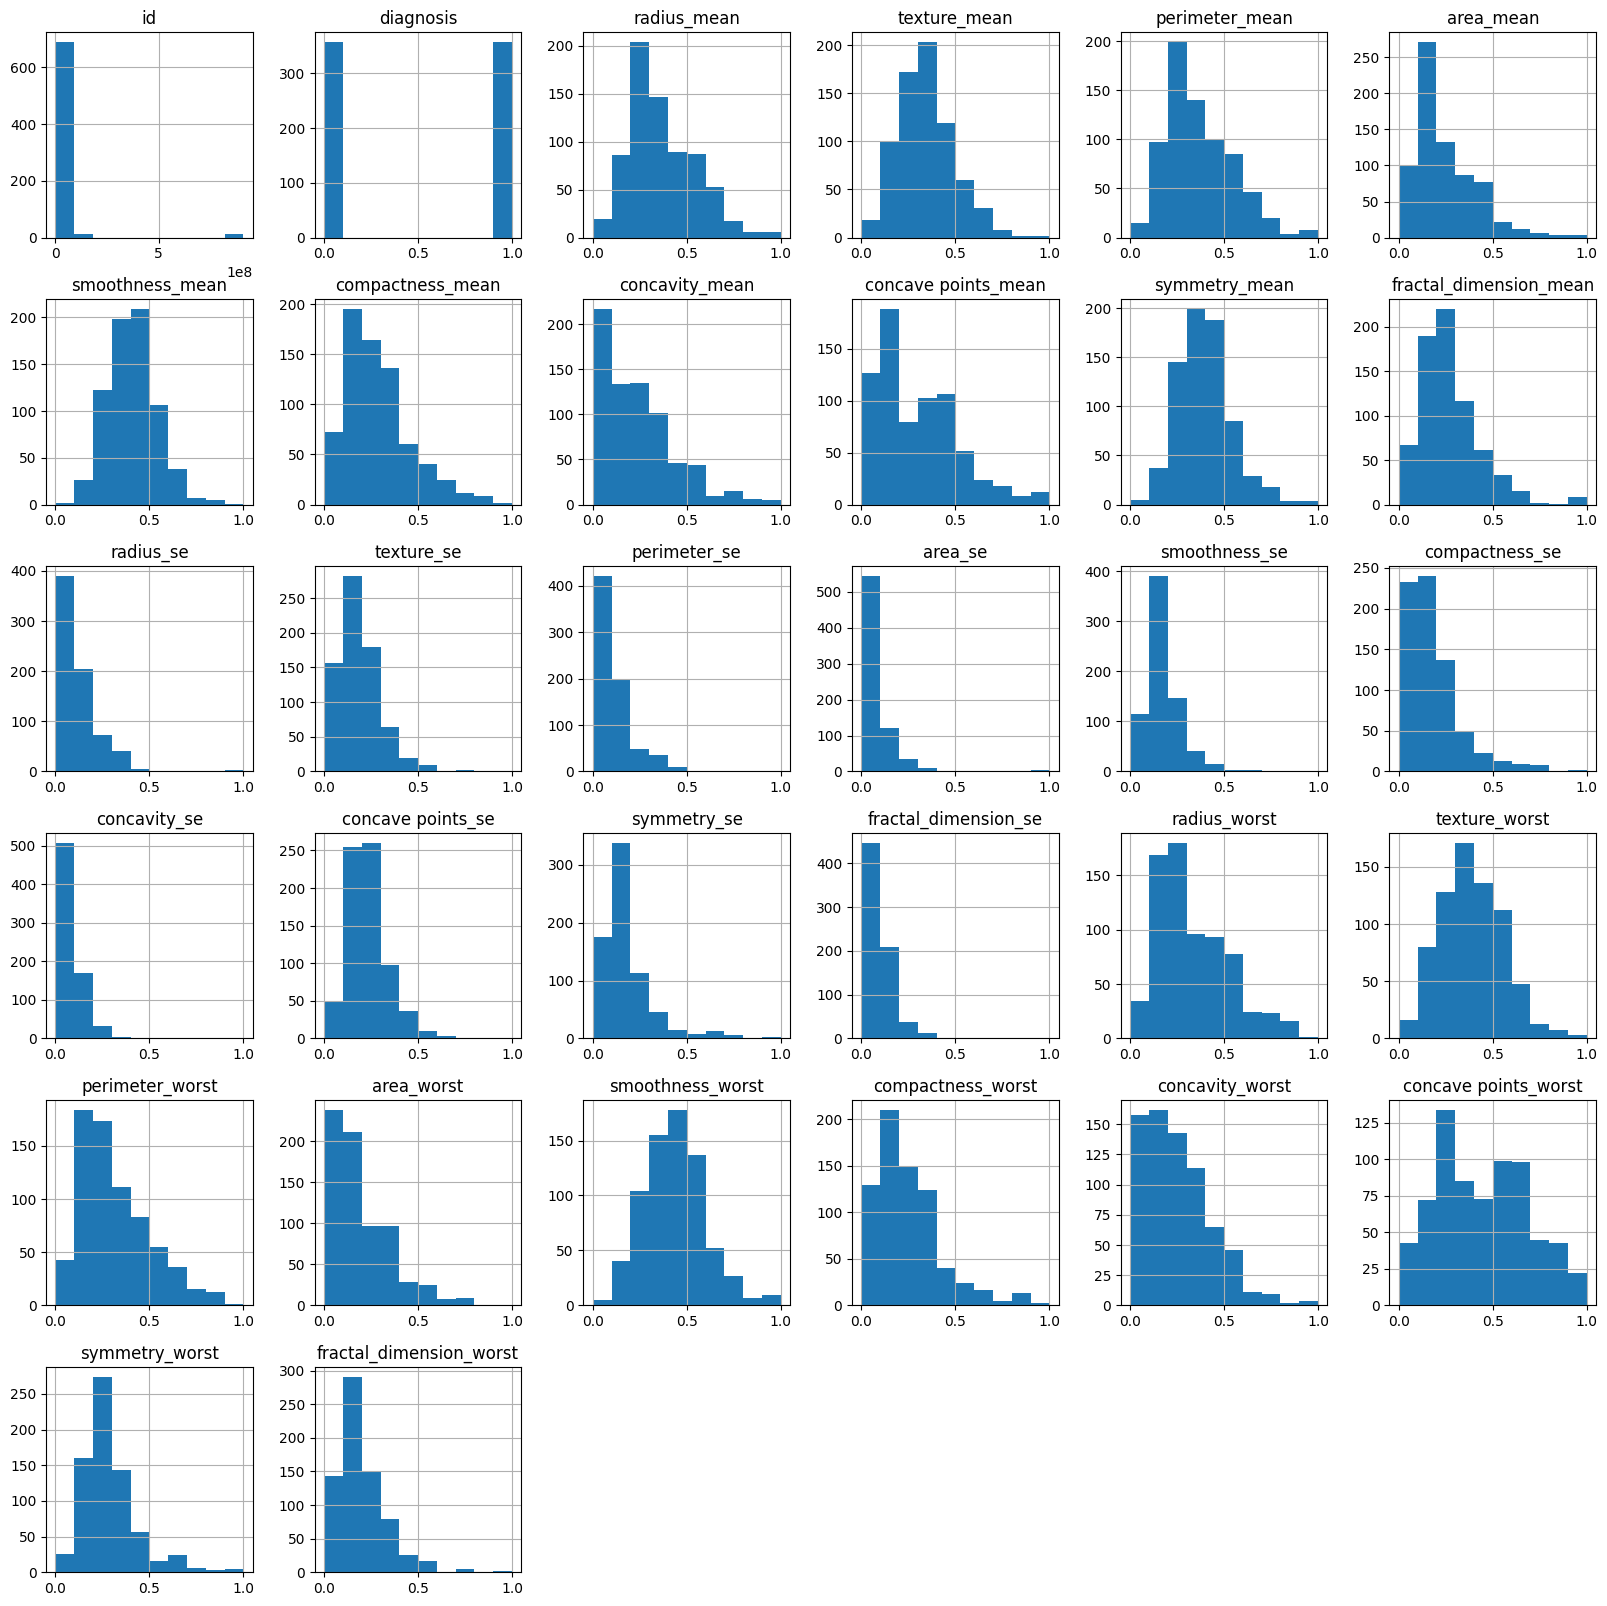

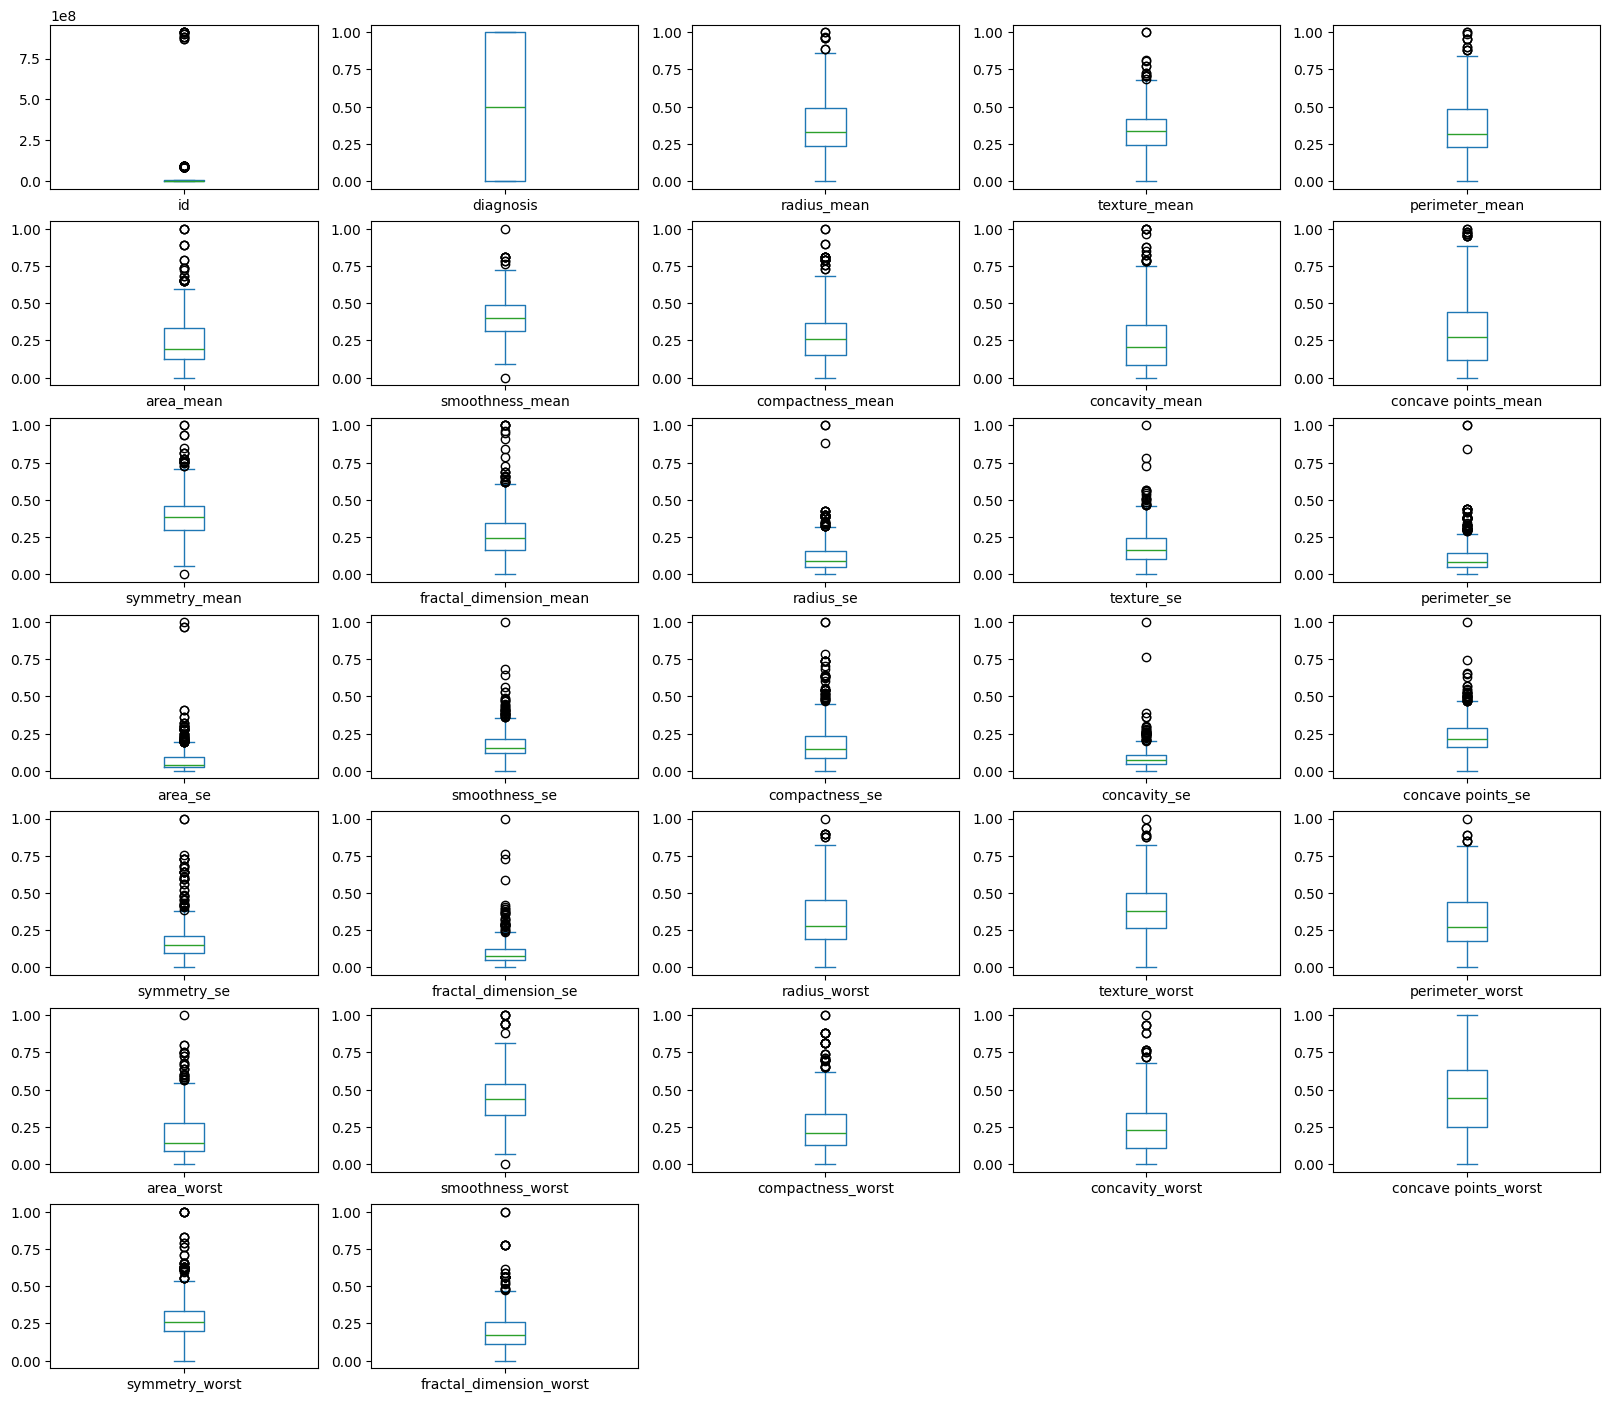

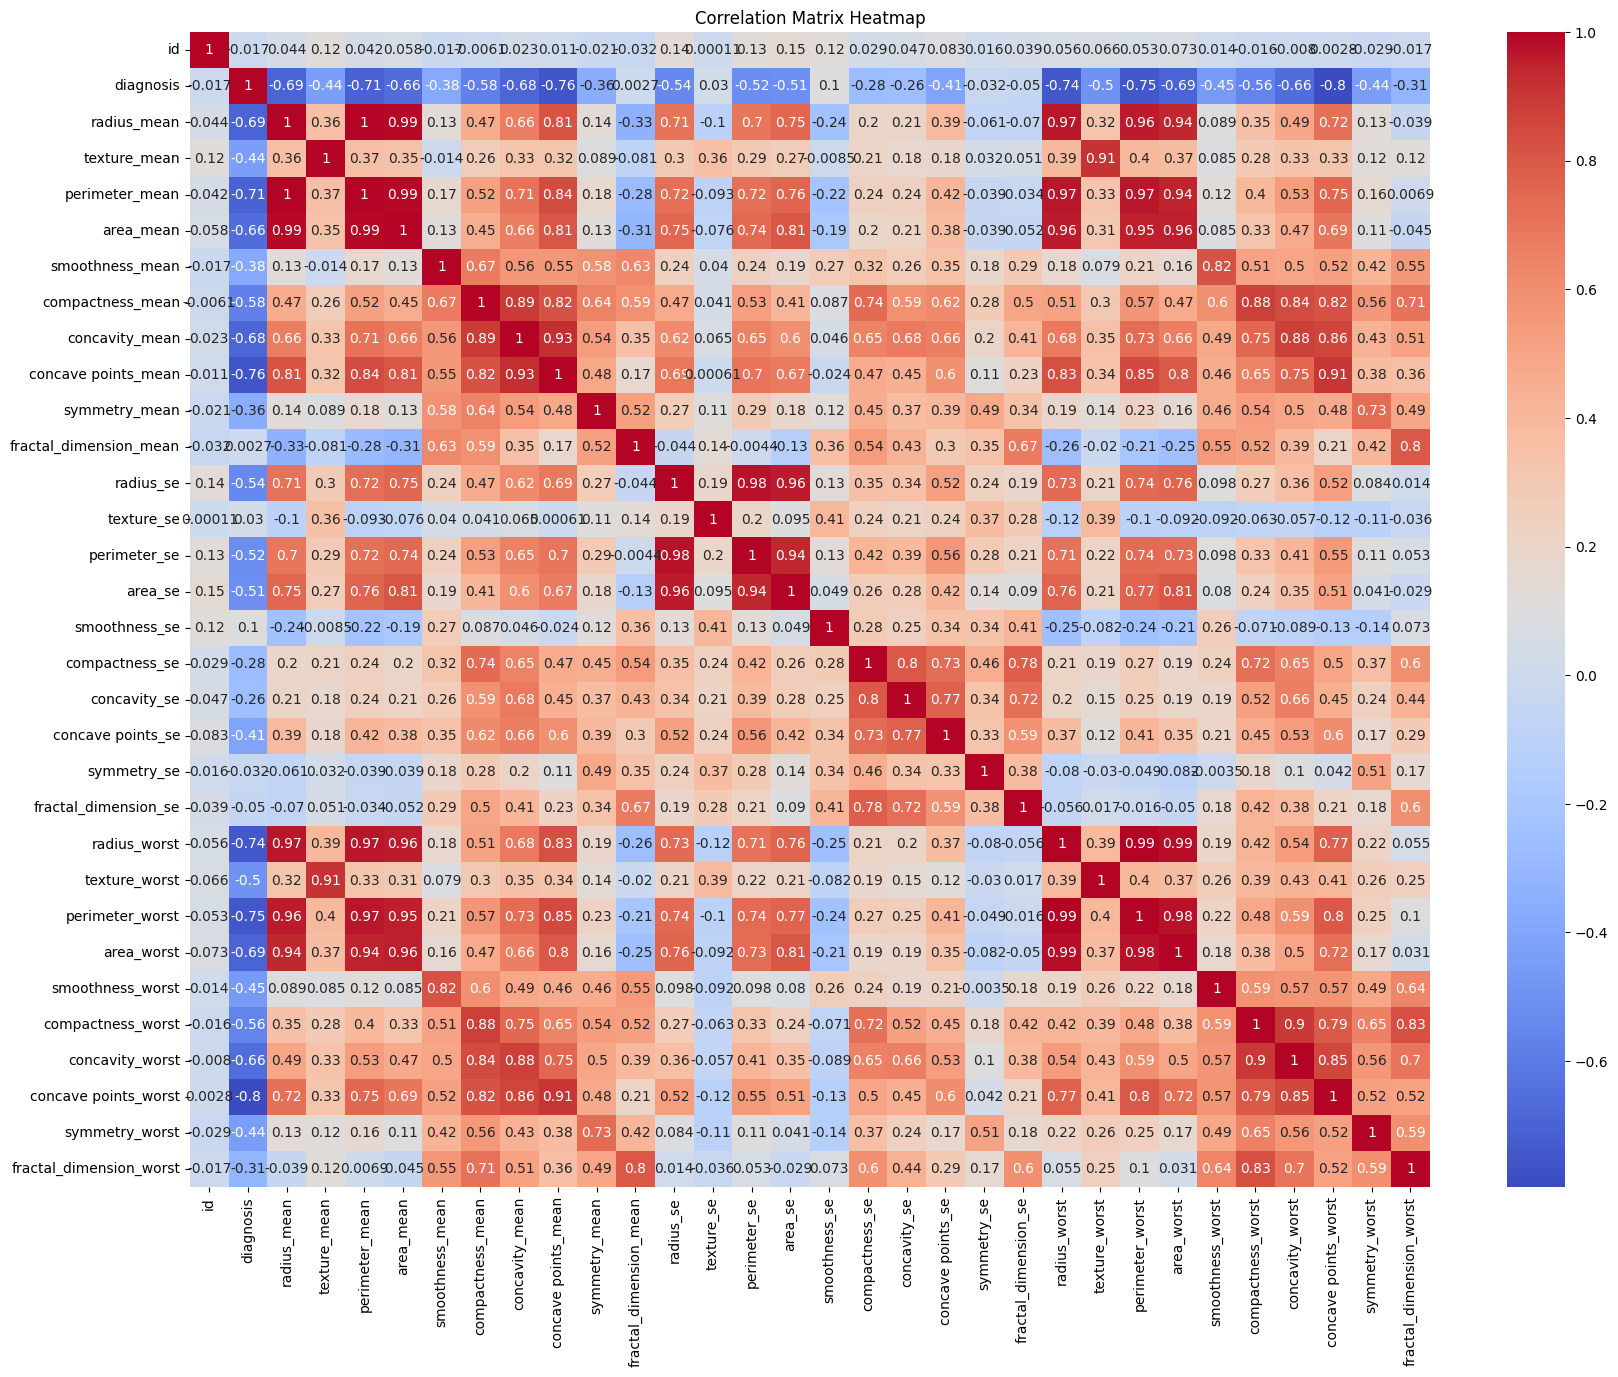

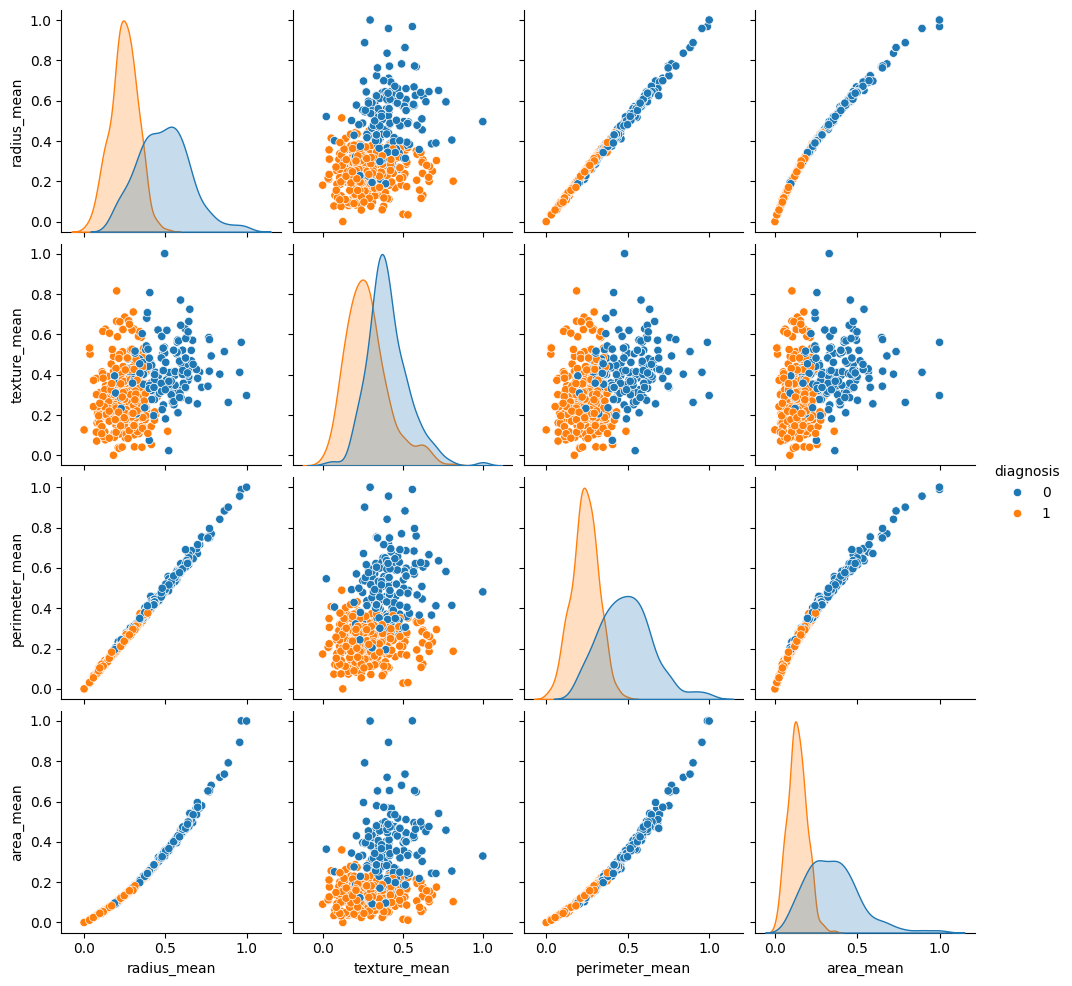

In [59]:
# Create histograms for each numerical feature
dataset_normalized.hist(figsize=(20, 20))
plt.show()

# Create boxplots for each numerical feature
dataset_normalized.plot(kind='box', subplots=True, layout=(8,5), sharex=False, sharey=False, figsize=(20,20))
plt.show()

# Create a correlation matrix heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(dataset_normalized.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Pairplot for a subset of features
sns.pairplot(dataset_normalized, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])
plt.show()